# 인공신경망 모델의 학습

- 3장에서 설명한 부분을 제외하고 주석을 달았습니다.
- y = x^2+3
- 발표자 영은) 이해를 위해 추가적으로 주석을 달았습니다.

## 필요한 라이브러리 불러오기

In [1]:
import torch
import torch.nn as nn # 신경망 모델들 포함
import torch.optim as optim # 경사하강법 알고리즘
import torch.nn.init as init # 텐서에 초기값을 주기 위해 필요한 함수들

## 데이터 생성

In [2]:
num_data = 1000 # 사용할 데이터의 수
num_epoch = 10000 # 경사하강법 반복 횟수

noise = init.normal_(torch.FloatTensor(num_data,1),std=1) 
# [num_data,1] 모양 텐서 noise를 init.normal_() 함수를 통해 초기화
# 이때, 평균은 디폴트 0 , 표준편차는 1로 지정

x = init.uniform_(torch.Tensor(num_data,1),-15,15)
# [num_data,1] 모양 텐서 x를 init.uniform_() 함수를 통해 초기화
# -15에서 15까지의 숫자들이 무작위로 들어가게 된다.

y = (x**2) + 3 
y_noise = y + noise
# y에 noise 추가한 변수 생성
# 데이터는 보통 노이즈가 추가된 상태로 들어오기 때문에 현실성 반영을 위해

# 모델, 손실 함수, 최적화 함수 설정

In [3]:
# 3장의 예시처럼 하나의 값이 들어가서 하나의 값이 나오기 때문에 모델의 처음과 끝 특성의 개수는 1개입니다.

# https://pytorch.org/docs/stable/nn.html?highlight=sequential
# torch.nn.Sequential
# Sequential 모듈은 다양한 모듈을 담을 수 있는 일종의 리스트라고 보면 됩니다.
# Sequential 에 정의된 순서대로 연산이 진행되며, 많은 연산을 묶어서 한번에 관리할 수 있어서 편리합니다.

# 아래 코드는 특성의 개수가 1 -> 6 -> 10 -> 6 -> 1개로 변하는 인공신경망입니다. 
# 또한 선형변환 이후 활성화 함수를 넣어 비선형성이 생기도록 했습니다.

model = nn.Sequential(
          nn.Linear(1,6),
          nn.ReLU(),
          nn.Linear(6,10),
          nn.ReLU(),
          nn.Linear(10,6),
          nn.ReLU(),
          nn.Linear(6,1),
      )

loss_func = nn.L1Loss() 
# 모델에서 나온 결과와 y_noise의 차이를 구하는 척도로 L1손실 사용
# L1 loss = 차이의 절대값의 평균

optimizer = optim.SGD(model.parameters(),lr=0.0002)
# torch.optim에서 SGD 옵티마이저를 불러온다. SGD = Stochastic Gradient Descent
# 최적화할 변수들과 함께 학습률을 lr로 전달한다.
# 최적화할 변수로 model.parameters()라는 함수를 사용하여 선형회귀 모델의 변수 w,b를 전달했다.

## 모델의 학습

In [4]:
loss_array = [] # 손실이 어떻게 변하는지 확인하기 위해 loss_arr를 만들어 기록

# 10000 학습횟수만큼 반복
for i in range(num_epoch): 
    
    # 이전 학습의 기울기를 지우고 최적화 함수로 초기화
    # 기울기를 지우지 않으면 기존의 업데이트 때문에 학습이 잘 이루어지지 않는다.
    optimizer.zero_grad() 

    # 입력값 x를 모델에 넣어 결과값을 얻는다.
    output = model(x)
    
    # 결과값과 목표값의 차이를 L1 손실 함수로 구해준다.
    loss = loss_func(output,y_noise)

    # 손실에 대한 기울기
    loss.backward()

    # 구한 기울기를 이용해 모델의 변수를 업데이트
    optimizer.step()
    
    # 손실을 loss_array에 추가해준다.
    loss_array.append(loss)

## 손실 그래프

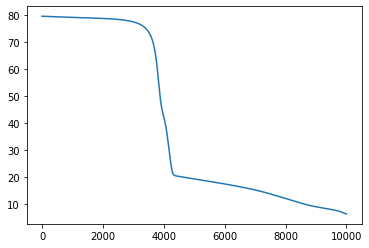

In [5]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

## 학습된 모델의 결과값과 실제 목표값의 비교

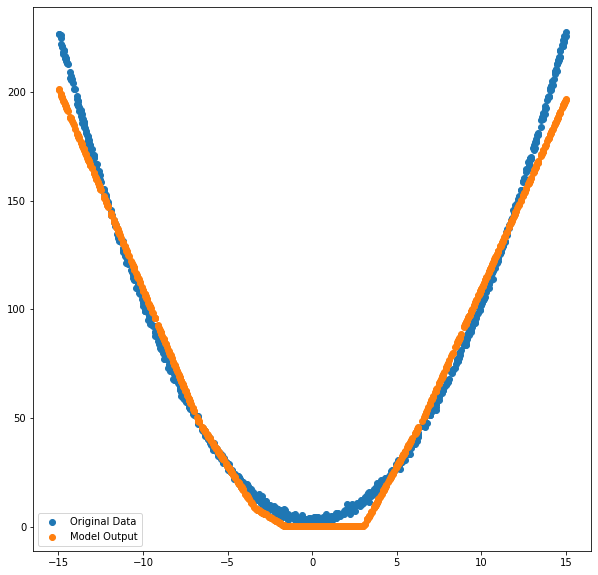

In [6]:
plt.figure(figsize=(10,10))

# 현재 연산 그래프에 속해있는 x, output 값을 detach를 통해 분리하고, 텐서를 넘파이 배열로 바꿔서 plt.scatter에 전달한다.
plt.scatter(x.detach().numpy(),y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()